# Module C: chapter 19. Root Finding

### Part One: Notes

###### The root or zero of a function, 𝑓(𝑥), is an 𝑥𝑟 such that 𝑓(𝑥𝑟)=0.

###### Using **fsolve** function from **scipy** to compute the root of 𝑓(𝑥)=cos(𝑥)−𝑥 near −2. Verify that the solution is a root (or close enough)

In [6]:
import numpy as np
from scipy import optimize

f = lambda x: np.cos(x) - x
r = optimize.fsolve(f, -2)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [0.73908513]
result= [0.]


#### Bisection Method

###### The Intermediate Value Theorem says that if 𝑓(𝑥) is a continuous function between 𝑎 and 𝑏, and sign(𝑓(𝑎))≠sign(𝑓(𝑏)), then there must be a 𝑐, such that 𝑎<𝑐<𝑏 and 𝑓(𝑐)=0. 

###### Program a function my_bisection(f, a, b, tol) that approximates a root 𝑟 of 𝑓, bounded by 𝑎 and 𝑏 to within |𝑓[(𝑎+𝑏)/2])|<tol.

In [7]:
import numpy as np

def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

###### The sqrt(2) can be computed as the root of the function 𝑓(𝑥)=𝑥^2−2. Starting at 𝑎=0 and 𝑏=2, use my_bisection to approximate the sqrt(2) to a tolerance of |𝑓(𝑥)|<0.1 and |𝑓(𝑥)|<0.01. Verify that the results are close to a root by plugging the root back into the function.

In [8]:
f = lambda x: x**2 - 2

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.4375
r01 = 1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375


In [9]:
#  See what will happen if you use 𝑎=2 and 𝑏=4 for the above function.
my_bisection(f, 2, 4, 0.01)

Exception: ignored

#### Newton-Raphson Method
###### Let 𝑓(𝑥) be a smooth and continuous function and 𝑥𝑟 be an unknown root of 𝑓(𝑥). Assume that 𝑥0 is “close enough” to 𝑥𝑟, the linear approximation of 𝑓(𝑥) around 𝑥0 is 𝑓(𝑥)≈ L(x) = 𝑓(𝑥0)+𝑓′(𝑥0)(𝑥−𝑥0). Using this approximation, we find 𝑥1 such that 𝑓(𝑥1)=0. Plugging these values into the linear approximation results in the equation 0=𝑓(𝑥0)+𝑓′(𝑥0)(𝑥1−𝑥0), which when solved for 𝑥1 is $𝑥1=𝑥0−𝑓(𝑥0)/𝑓′(𝑥0).$
###### Newton step computes an improved guess, 𝑥𝑖, using a previous guess 𝑥𝑖−1, and is given by the equation

###### 𝑥𝑖 = 𝑥𝑖−1−𝑔(𝑥𝑖−1)/𝑔′(𝑥𝑖−1).

###### The Newton-Raphson Method of finding roots iterates Newton steps from 𝑥0 until the error is less than the tolerance.

In [13]:
import numpy as np

f = lambda x: x**2 -2
f_prime = lambda x: 2*x

newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


###### Write a function 𝑚𝑦_𝑛𝑒𝑤𝑡𝑜𝑛(𝑓,𝑑𝑓,𝑥0,𝑡𝑜𝑙), where the output is an estimation of the root of f, f is a function object 𝑓(𝑥), df is a function object to 𝑓′(𝑥), x0 is an initial guess, and tol is the error tolerance. The error measurement should be |𝑓(𝑥)|.

In [14]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [15]:
# Use my_newton= to compute sqrt(2) to within tolerance of 1e-6 starting at x0 = 1.5.
import numpy as np

f = lambda x: x**2-2
f_prime = lambda x: 2*x
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))

estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


In [16]:
# Consider the polynomial 𝑓(𝑥)=𝑥**3−100𝑥**2−𝑥+100.
# This polynomial has a root at 𝑥=1 and 𝑥=100. 

# Use the Newton-Raphson to find a root of 𝑓 starting at 𝑥0=0.

f = lambda x: x**3 - 100*x**2 -x + 100
f_prime = lambda x: 3*(x**2) -200 *x -1
estimate1 = my_newton(f, f_prime, 0, 1e-6)
print("estimate =", estimate1)

# starting at x0=0.1
estimate2 = my_newton(f, f_prime, 0.2, 1e-6)
print("estimate =", estimate2)

# starting at x0=-0.2
estimate3 = my_newton(f, f_prime, -0.2, 1e-6)
print("estimate =", estimate3)

estimate = 100.0
estimate = 1.0000000000029647
estimate = -1.0000000000368956


###### **Notes:** it seems like that the root find by the newton raphson method is dependent upon the initial guess vaule and cannot find all roots.

#### Root Finding in Python

In [17]:
# Compute the root of the function 𝑓(𝑥)=𝑥**3−100*𝑥**2−𝑥+100 using fsolve.

from scipy.optimize import fsolve
f = lambda x: x**3-100*x**2-x+100

fsolve(f, [2, 80])

array([  1., 100.])

In [18]:
fsolve(f, [2, -2, 80])

array([  0.99999977,  -1.00000012, 100.        ])

In [19]:
fsolve(f, [2, -1, 80])

array([  1.,  -1., 100.])

### Part Two: Practice Qeustions

###### (1) Write a function 𝑚𝑦_𝑛𝑡ℎ_𝑟𝑜𝑜𝑡(𝑥,𝑛,𝑡𝑜𝑙), where 𝑥 and 𝑡𝑜𝑙 are strictly positive scalars, and 𝑛 is an integer strictly greater than 1. The output argument, 𝑟, should be an approximation 𝑟=𝑥‾‾√𝑁, the 𝑁-th root of 𝑥. This approximation should be computed by using the Newton Raphson method to find the root of the function 𝑓(𝑦)=𝑦𝑁−𝑥. The error metric should be |𝑓(𝑦)|.

In [20]:
import numpy as np

def my_nth_root(x, n, tol):
  f = lambda y: y**n - x
  df = lambda y: n*x**(n-1)
  r = x/n     # set initial guess of r = x/2

  while abs(f(r)) >= tol: #check to see if the guess is close enouth to the real root
    r = r - f(r)/df(r) #if f(r) is greater than tol, take this old guessed r value and plug into the fomular to creat a new binding of r
  
  return r
    


In [21]:
# test f(y) = y^2 - 2  (x =2, n =2, tol = 0.000005)

my_nth_root(2,2, 0.000005)

1.4142126331013782

In [22]:
# test f(y) = y^3 - 8  (x = 8, n =3, tol = 0.000005),

my_nth_root(8, 3, 0.000005)

2.000000400299268

In [23]:
# test f(y) = y^2 - 4  (x =4, n =2, tol = 0.000005)

my_nth_root(4, 2, 0.000005)

2.0

###### (2) Write a function 𝑚𝑦_𝑏𝑖𝑠𝑒𝑐𝑡𝑖𝑜𝑛(𝑓,𝑎,𝑏,𝑡𝑜𝑙), that returns [𝑅,𝐸], where 𝑓 is a function object, 𝑎 and 𝑏 are scalars such that 𝑎<𝑏, and 𝑡𝑜𝑙 is a strictly positive scalar value. The function should return an array, 𝑅, where 𝑅[𝑖] is the estimation of the root of 𝑓 defined by (𝑎+𝑏)/2 for the 𝑖-th iteration of the bisection method. Remember to include the initial estimate. The function should also return an array, 𝐸, where 𝐸[𝑖] is the value of |𝑓(𝑅[𝑖])| for the 𝑖-th iteration of the bisection method. The function should terminate when 𝐸(𝑖)<𝑡𝑜𝑙. You may assume that sign(𝑓(𝑎))≠sign(𝑓(𝑏)).

###### Clarification: The input 𝑎 and 𝑏 constitute the first iteration of bisection, and therefore 𝑅 and 𝐸 should never be empty.

In [24]:
import numpy as np
R = []
E = []

def my_bisection(f, a, b, tol):
  
  r = (a+b)/2  #initial r value
  e = np.abs(f(r))  #initial value of E
  R.append(r)  #bind initial r to R
  E.append(e)  #bind initial e to E 

  if np.sign(f(a)) == np.sign(f(b)):
    raise Exception (" The scalars a and b do not bound a root")

  while e >= tol:
    
    if np.sign(f(a)) == np.sign(f(r)): #case where r is am imporvement on a

      return my_bisection(f, r, b, tol)  
      
    elif np.sign(f(b)) == np.sign(f(r)): # case where r is an improvement on b
      
      return my_bisection(f, a, r, tol)
   
  print('R = ', R)
  print('E = ', E)
  

In [25]:
# test case (1):
f = lambda x: x**2 - 2
my_bisection(f, 0, 2, 1e-1)

R =  [1.0, 1.5, 1.25, 1.375, 1.4375]
E =  [1.0, 0.25, 0.4375, 0.109375, 0.06640625]


In [26]:
# test case (2):
# do not forget to reset R and E before executing other test case, or run the def function one more time. 
# Otherwise, the value of the test case two will be appended after the test case one's resule
R = []
E = []

f = lambda x: np.sin(x) - np.cos(x)
my_bisection(f, 0, 2, 1e-2)


R =  [1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125]
E =  [0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.126546644072702, 0.038323093040207756, 0.005866372111545948]


###### (3) Write a function 𝑚𝑦_𝑛𝑒𝑤𝑡𝑜𝑛(𝑓,𝑑𝑓,𝑥0,𝑡𝑜𝑙), that returns [𝑅,𝐸], where 𝑓 is a function object, 𝑑𝑓 is a function object to the derivative of 𝑓, 𝑥0 is an initial estimation of the root, and 𝑡𝑜𝑙 is a strictly positive scalar. The function should return an array, 𝑅, where 𝑅[𝑖)] is the Newton-Raphson estimation of the root of 𝑓 for the 𝑖-th iteration. Remember to include the initial estimate. The function should also return an array, 𝐸, where 𝐸[𝑖] is the value of |𝑓(𝑅[𝑖])| for the 𝑖-th iteration of the Newton-Raphson method. The function should terminate when 𝐸(𝑖)<𝑡𝑜𝑙. You may assume that the derivative of 𝑓 will not hit 0 during any iteration for any of the test cases given.

In [27]:
import numpy as np

R = []
E = []

def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    r = x0   # bind the initial value x0 to r
    e = np.abs(f(r))  # bind the initial value f(x0) to e
    R.append(r)
    E.append(e)

    while e >= tol:

      return my_newton(f, df, x0 - f(x0)/df(x0), tol)
    print('R = ', R)
    print('E = ', E)

In [28]:
# test case (1)

f = lambda x: x**2 - 2
df = lambda x: 2*x
my_newton(f, df, 1, 1e-5)

R =  [1, 1.5, 1.4166666666666667, 1.4142156862745099]
E =  [1, 0.25, 0.006944444444444642, 6.007304882871267e-06]


In [29]:
# test case (2):
R=[]
E=[]
f = lambda x: np.sin(x) - np.cos(x)
df = lambda x: np.cos(x) + np.sin(x)
my_newton(f, df, 1, 1e-5)

R =  [1, 0.782041901539138, 0.7853981759997019]
E =  [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08]


###### (4) Consider the problem of building a pipeline from an offshore oil platform, a distance 𝐻 miles from the shoreline, to an oil refinery station on land, a distance 𝐿 miles along the shore. The cost of building the pipe is 𝐶ocean/mile while the pipe is under the ocean and 𝐶land/mile while the pipe is on land. The pipe will be built in a straight line toward the shore where it will make contact at some point, 𝑥, between 0 and 𝐿. It will continue along the shore on land until it reaches the oil refinery. See the figure for clarification.
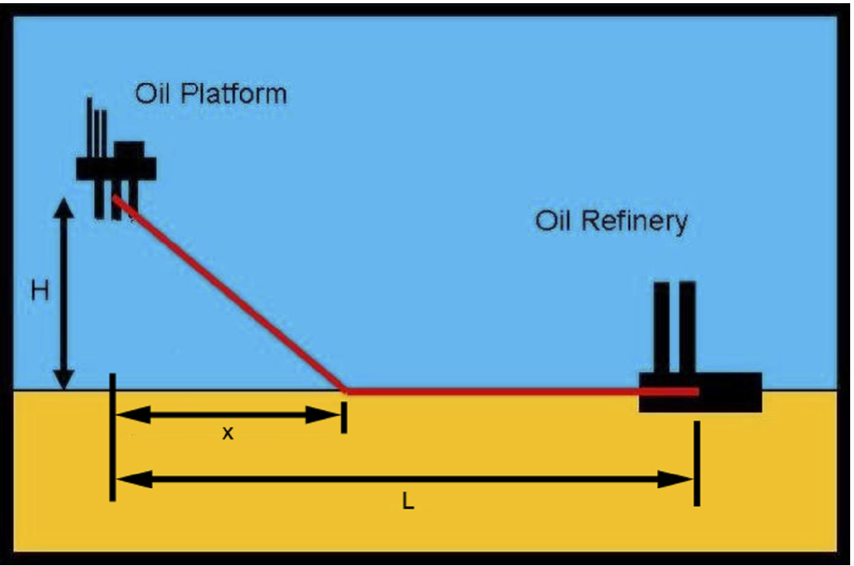
###### Write a function 𝑚𝑦_𝑝𝑖𝑝𝑒_𝑏𝑢𝑖𝑙𝑑𝑒𝑟(𝐶_𝑜𝑐𝑒𝑎𝑛,𝐶_𝑙𝑎𝑛𝑑,𝐿,𝐻), where the input arguments are as described earlier, and 𝑥 is the x-value that minimizes the total cost of the pipeline. You should use the bisection method to determine this value to within a tolerance of 1×10−6 starting at an initial bound of 𝑎=0 and 𝑏=𝐿.

In [30]:
import numpy as np

def my_pipe_builder(C_ocean, C_land, L, H):

  f = lambda x: C_ocean*(x**2+H**2)**(1/2) + C_land*(L-x)
  a = 0 # initial left boundary
  b = L # initial right boundary
  c = (-1 + np.sqrt(5)) /2  #golden rule constant
  x1 = c*a+(1-c)*b  #initial test values
  x2 = (1-c)*a+c*b
  f1 = f(x1) 
  f2 = f(x2)

  while np.abs(b-a) >= 0.000001: #do the loop until the gap between x0 and x2 are less than 0.0000001
    
    if f1 < f2: # moving right boundary
      b = x2
      x2 = x1
      f2 = f1
      x1 = x1 = c*a+(1-c)*b
      f1 = f(x1)
    else: # moving left boundary
      a = x1
      x1 = x2
      f1 = f2
      x2 = x2 = (1-c)*a+c*b
      f2 = f(x2)

  return a



In [31]:
#test case (1):

my_pipe_builder(20, 10, 100, 50)


28.867512984086375

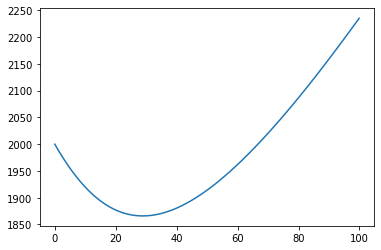

In [32]:
# draw the plot while C_ocean, C_land, L and H are 20, 10, 100 and 50, respectively to confirm the result
import matplotlib.pyplot as plt

C_ocean = 20
C_land = 10
L = 100
H = 50
x = np.arange(0, 100, 0.1)
f = C_ocean*(x**2+H**2)**(1/2) + C_land*(L-x)
plt.plot(x, f)
plt.show()

In [33]:
# test case (2):
my_pipe_builder(30, 10, 100, 50)

17.677669979738933

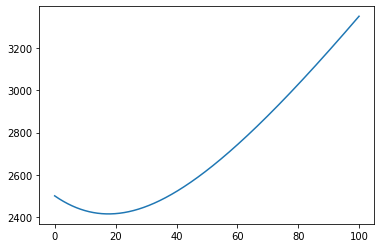

In [34]:
# draw the plot while C_ocean, C_land, L and H are 30, 10, 100 and 50, respectively to confirm the result
import matplotlib.pyplot as plt

C_ocean = 30
C_land = 10
L = 100
H = 50
x = np.arange(0, 100, 0.1)
f = C_ocean*(x**2+H**2)**(1/2) + C_land*(L-x)
plt.plot(x, f)
plt.show()

In [35]:
# test case (3):
my_pipe_builder(30, 10, 100, 20)

7.071067925125921

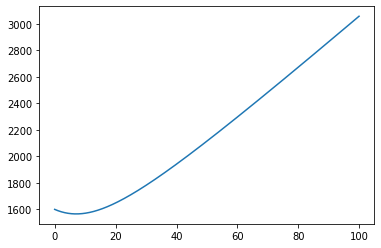

In [36]:
# draw the plot while C_ocean, C_land, L and H are 20, 10, 100 and 50, respectively, to confirm the result
import matplotlib.pyplot as plt

C_ocean = 30
C_land = 10
L = 100
H = 20
x = np.arange(0, 100, 0.1)
f = C_ocean*(x**2+H**2)**(1/2) + C_land*(L-x)
plt.plot(x, f)
plt.show()